### Poetic books: basic statistics
This notebook helps to get an overview on number and features of books according to the metadata.

In [1]:
library(tidyverse)
library(wesanderson)

theme_set(theme_minimal())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Load data
dat <- read.csv("../data/poetry_books_experiment_wide.csv") %>% select(-X)

glimpse(dat)

Rows: 967
Columns: 22
$ id               <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16…
$ group            <chr> "sep_nar", "col_lyr", "sep_nar", "col_lyr", "sep_nar"…
$ author_sign      <chr> "Артемьев П.", "Батюшков К.", "Александр Б.", "Борозд…
$ author_full_name <chr> "Артемьев Павел Алексеевич", "Батюшков Константин Ник…
$ title            <chr> "Страдалец: Повесть в стихах, взятая с истинного расс…
$ city             <chr> "М.", "СПб.", "СПб.", "М.", "СПб.", "М.", "СПб.", "СП…
$ publisher        <chr> "Селивановского", "И. Глазунова", "Крайя", "Семена", …
$ year             <int> 1834, 1834, 1834, 1834, 1834, 1834, 1834, 1834, 1834,…
$ pages            <int> 30, 270, 22, 79, 122, 35, 159, 128, 67, 71, 112, 88, …
$ size_cm          <int> 20, 22, 24, 22, 19, 24, 23, 18, 17, 18, 20, 22, 21, 1…
$ nlr              <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ rsl              <int> 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,…
$ rozanov         

In [7]:
# rewrite genre labels for more readable plots

# create a column with group labels
dat <- dat %>% 
  mutate(group_lable = recode(group, 
                              "col_lyr" = "Lyric-Collections", 
                              "sep_lyr" = "Lyric-Booklets", 
                              "sep_nar" = "Narrative-Booklets", 
                              "almanac" = "Almanacks",
                              "col_nar" = "Narrative-Collections"))

dat %>% 
  count(group_lable, sort = T)

group_lable,n
<chr>,<int>
Lyric-Collections,313
Lyric-Booklets,269
Narrative-Booklets,257
Almanacks,101
Narrative-Collections,27


In [8]:
# number of books found in each library collection
# total number of books in the dataset: 967
dat %>% 
  select(nlr:spbgu) %>% 
  summarise(across(where(is.numeric), ~ sum(.x, na.rm = T)))

nlr,rsl,rozanov,us_harvard,cz_slk,lt_vul,pl_bn,pl_buw,ee_ester,fi_sl,spbgu
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
924,529,230,167,185,22,19,18,58,217,93


#### Number of books in each group

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


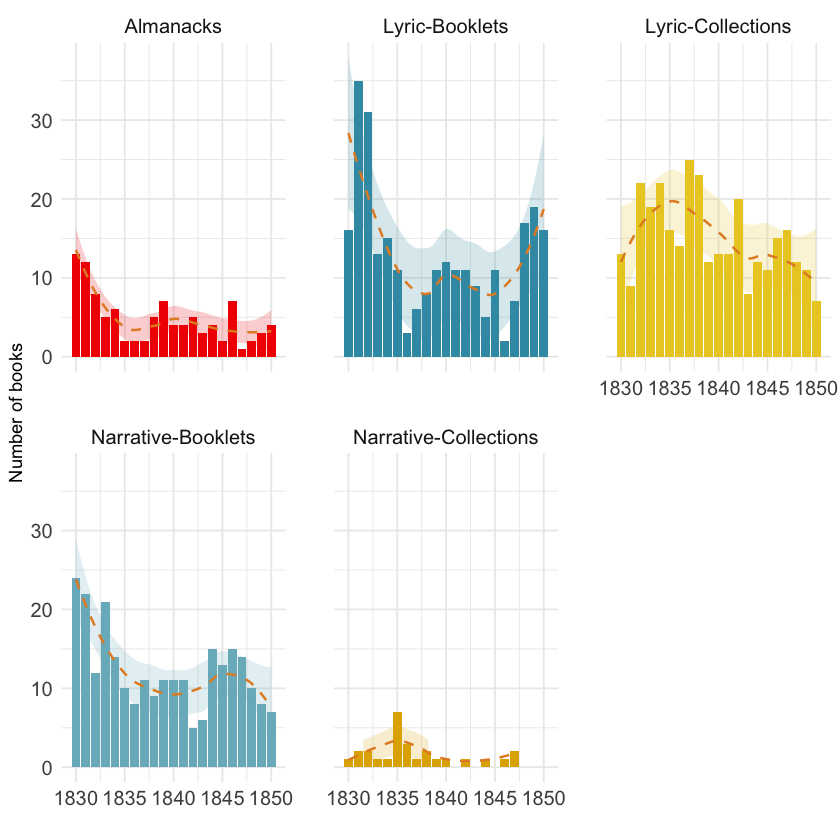

In [9]:
#### Plot: n books in each group on a timeline ####

dat %>% 
  group_by(group_lable, year) %>% 
  count() %>% 
  ggplot(aes(x = year, y = n, fill = group_lable)) + 
  geom_col() + 
  geom_smooth(alpha = 0.2, size = 0.7, color = "#E48C2AFF", linetype = 2) + 
  scale_fill_manual(values = c(wes_palette("Zissou1")[5],
                              wes_palette("Zissou1")[1],
                              wes_palette("Zissou1")[3],
                              wes_palette("Zissou1")[2],
                              wes_palette("Zissou1")[4])) + 
  scale_y_continuous(limits = c(0, NA)) + 
  facet_wrap(~group_lable, scales = "fixed") + 
  labs(fill = "",
       x = "", 
       y = "Number of books") + 
  theme(legend.position = "None", 
        axis.text = element_text(size = 12), 
        strip.text = element_text(size = 12), # facet lable size
        legend.text = element_text(size = 12),
        panel.spacing = unit(2, "lines"))

In [11]:
ggsave("../plots/Fig_3.pdf", plot = last_plot(), 
      height = 6, width = 8, bg = "white", dpi = 300)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


In [13]:
dat %>% 
  mutate(year_group = floor(year/5)*5) %>% 
  mutate(year_group = ifelse(year_group == 1850, 1845, year_group)) %>% 
  group_by(year_group, group_lable) %>% 
  count() %>% 
  arrange(-desc(group_lable))

year_group,group_lable,n
<dbl>,<chr>,<int>
1830,Almanacs,44
1835,Almanacs,18
1840,Almanacs,20
1845,Almanacs,19
1830,Collection of lyric poems,85
1835,Collection of lyric poems,90
1840,Collection of lyric poems,66
1845,Collection of lyric poems,72
1830,Collection of narrative poems,7


#### Number of pages

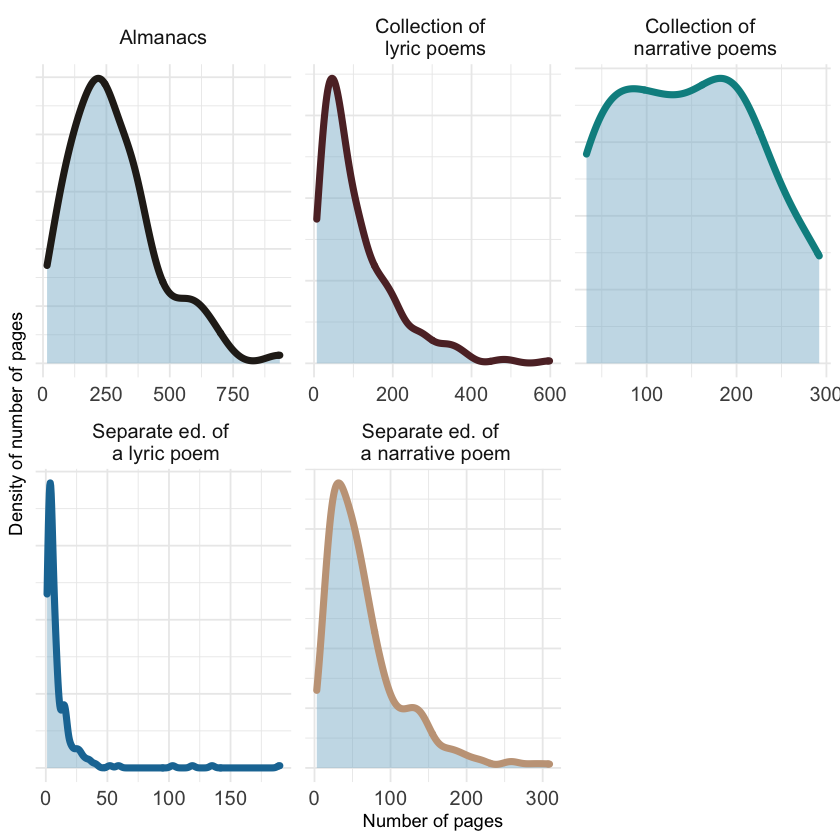

In [14]:
dat %>% 
  filter(!is.na(pages)) %>% 
  group_by(pages, group_lable) %>% 
  select(pages, group_lable) %>% 
  ggplot(aes(x = pages, color = group_lable)) + 
  geom_density(size = 2, fill = "#8EBBD2FF", alpha = 0.5) + 
  facet_wrap(~group_lable, scales = "free", nrow = 2) + 
  scale_color_manual(values = as.vector(ghibli_palettes$MarnieMedium1)) + 
  labs(x = "Number of pages",
       y = "Density of number of pages", 
       color = ""
       ) + 
  theme(axis.text.y = element_blank(),
        legend.position = "None", 
        axis.text = element_text(size = 12), 
        strip.text = element_text(size = 12))

In [19]:
x <- NULL
p <- NULL

pages_stats <- tibble(group = "", 
                      min_p = 0,
                      max_p = 0,
                      mean_p = 0,
                      median_p = 0)

for (i in 1:length(unique(dat$group))) {
  x <- unique(dat$group)[i]
  
  p <- dat %>% 
    filter(group == x) %>% 
    filter(!is.na(pages)) %>% 
    pull(pages)
  
  pages_stats <- rbind(pages_stats, c(x, min(p), max(p), round(mean(p),1), median(p)))
}

pages_stats %>% 
  filter(group != "")

group,min_p,max_p,mean_p,median_p
<chr>,<chr>,<chr>,<chr>,<chr>
sep_nar,3,309,66.2,51.5
col_lyr,7,598,108.2,76
sep_lyr,1,190,10.6,4
almanac,16,934,277.8,241.5
col_nar,33,292,146.2,133


#### Sizes

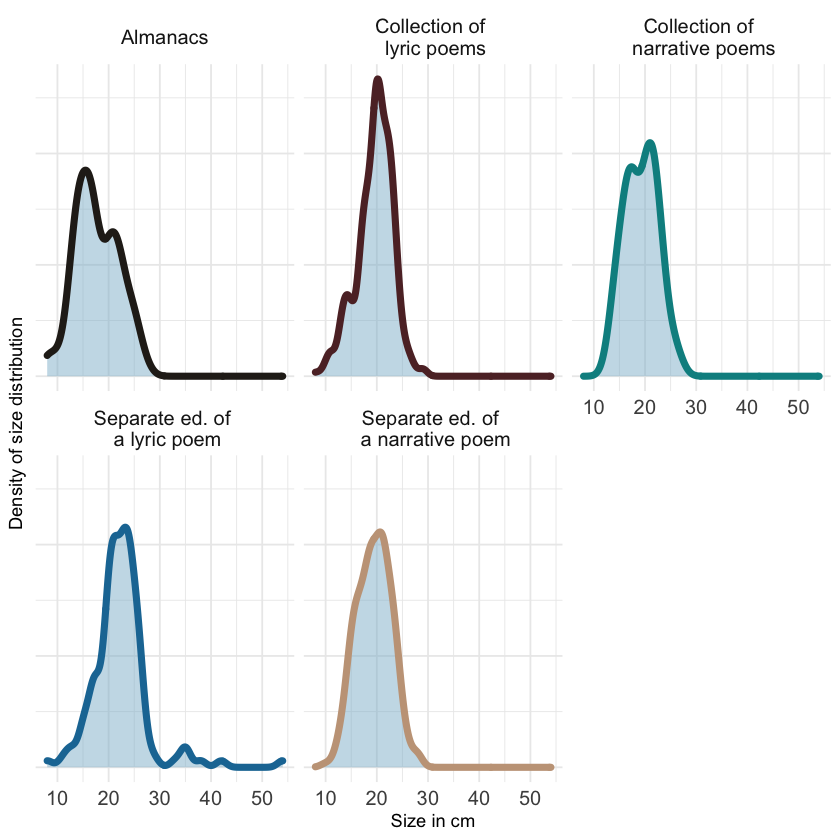

In [21]:
dat %>% 
  filter(!is.na(size_cm)) %>% 
  group_by(size_cm, group_lable) %>% 
  select(size_cm, group_lable) %>% 
  ggplot(aes(x = size_cm, color = group_lable)) + 
  geom_density(size = 2, fill = "#8EBBD2FF", alpha = 0.5) + 
  facet_wrap(~group_lable, scales = "fixed", nrow = 2) + 
  scale_color_manual(values = as.vector(ghibli_palettes$MarnieMedium1)) + 
  labs(x = "Size in cm",
       y = "Density of size distribution", 
       color = "") + 
  theme(axis.text.y = element_blank(),
        legend.position = "None", 
        axis.text = element_text(size = 12), 
        strip.text = element_text(size = 12))

In [23]:
x <- NULL
p <- NULL

sizes_stats <- tibble(group = "", 
                      min_p = 0,
                      max_p = 0,
                      mean_p = 0,
                      median_p = 0)

for (i in 1:length(unique(dat$group))) {
  x <- unique(dat$group)[i]
  
  p <- dat %>% 
    filter(group == x) %>% 
    filter(!is.na(size_cm)) %>% 
    pull(size_cm)
  
  sizes_stats <- rbind(sizes_stats, c(x, min(p), max(p), round(mean(p),1), median(p)))
}

sizes_stats %>% 
  filter(group != "")

group,min_p,max_p,mean_p,median_p
<chr>,<chr>,<chr>,<chr>,<chr>
sep_nar,10,28,19.4,19
col_lyr,8,29,19.6,20
sep_lyr,8,54,22.3,22
almanac,8,27,17.7,17
col_nar,14,26,19.3,20


`summarise()` has grouped output by 'year', 'group_lable'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


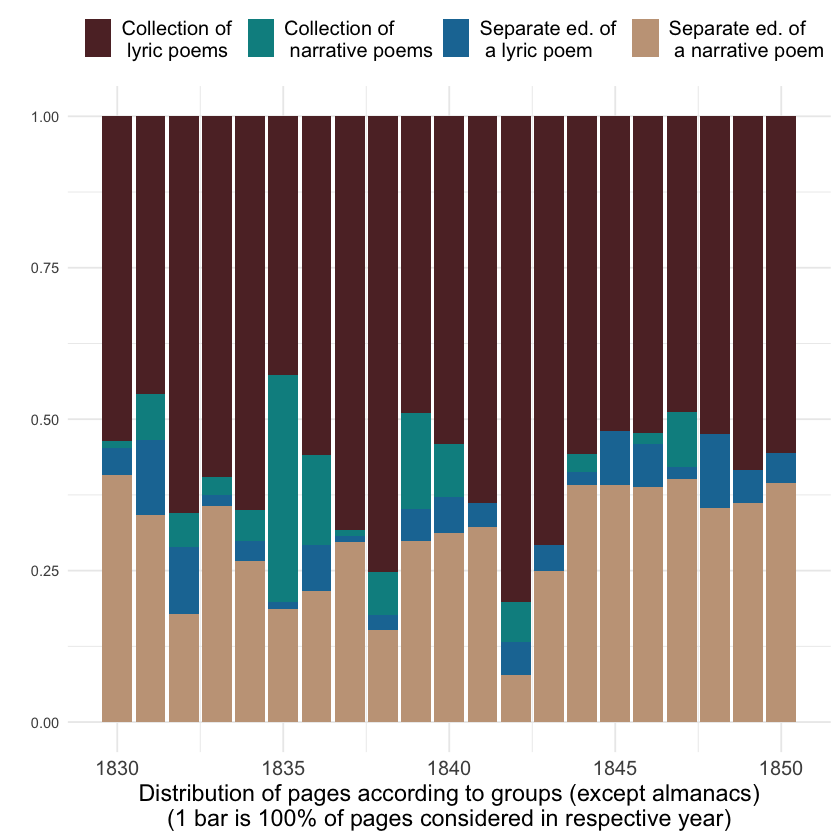

In [24]:
dat %>% 
  filter(!is.na(pages)) %>% 
  filter(group != "almanac") %>% 
  group_by(year, group_lable, pages) %>% 
  count() %>% 
  ungroup() %>% 
  group_by(year, group_lable) %>% 
  summarise(total_pages1 = pages*n) %>% 
  summarise(total_all = sum(total_pages1)) %>% 
  ggplot(aes(x = year, y = total_all, fill = group_lable)) + 
  geom_bar(position = "fill", stat = "identity") + 
  scale_fill_manual(values = as.vector(ghibli_palettes$MarnieMedium1)[2:6]) + 
  theme(axis.text.x = element_text(size = 12),
        axis.title.x = element_text(size = 14),
        legend.position = "top",
        legend.text = element_text(size = 12)) + 
  labs(x = "Distribution of pages according to groups (except almanacs)\n(1 bar is 100% of pages considered in respective year)",
       y = "", 
       fill = "")

`summarise()` has grouped output by 'year', 'group_lable'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


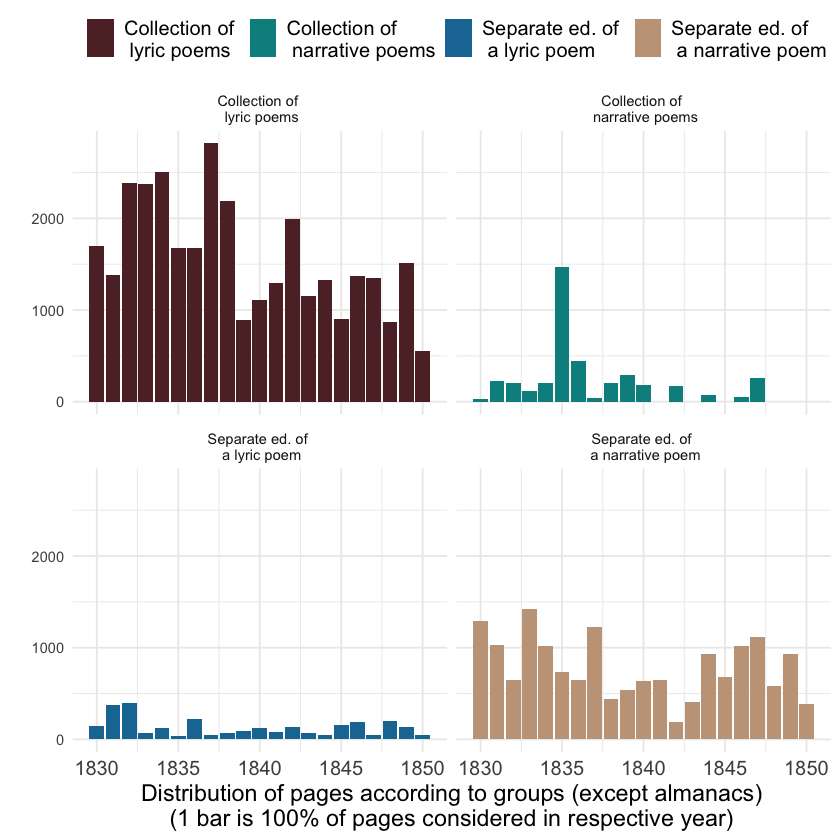

In [27]:
dat %>% 
  filter(!is.na(pages)) %>% 
  filter(group != "almanac") %>% 
  group_by(year, group_lable, pages) %>% 
  count() %>% 
  ungroup() %>% 
  group_by(year, group_lable) %>% 
  summarise(total_pages1 = pages*n) %>% 
  summarise(total_all = sum(total_pages1)) %>% 
  ggplot(aes(x = year, y = total_all, fill = group_lable)) + 
  geom_bar(stat = "identity") + 
  facet_wrap(~group_lable, scales = "fixed") + 
  scale_fill_manual(values = as.vector(ghibli_palettes$MarnieMedium1)[2:6]) + 
  theme(axis.text.x = element_text(size = 12),
        axis.title.x = element_text(size = 14),
        legend.position = "top",
        legend.text = element_text(size = 12)) + 
  labs(x = "Distribution of pages according to groups (except almanacs)\n(1 bar is 100% of pages considered in respective year)",
       y = "", 
       fill = "")